# _Project Data Science BIPM Missed Appointments_

## 1. General Information

- Group name on Kaggle : Data Detectives
- Student Names with Student ID : Fernanda Souza Dalmolin(), Victor Barbay(), Yasmin Hilles(), Buket Bayar()

## 2. Business Understanding

- Problem: Many patients miss their scheduled appointments.
- Goal: Develop a machine learning model that predicts if a patient will miss a future appointment.
- Assumptions: Older patients, people who does not get a reminder are more tend to miss apointments, the closer the appointment date to schedule data make people more likely to go to their appointments.

The problem identified by the hospital was that many patients miss their scheduled appointments, which leads to inefficiencies in the healthcare industry. The goal of this project is to develop a machine learning model that predicts if a patient will miss a future appointment. 

## 3. Data Understanding (Exploratory Data Analysis)
### 3.1 Description of the data set: 
- There are 14 columns with 3 numerical and 11 categorical columns.
- There are columns with Missing Values: 5 (Age, Community, Social Walfare, Hypertension, Alcoholism)

The dataset we were given is a dataset from a Brazilian hospital (identified by the neighborhoods mentioned). The dataset consists of 88,42 entries with 14 columns. 11 are categorical values, and 3 of these columns contain numerical values. The dataset contains information about patient appointments in a determinate hospital, the dataset contains a range of personal data from people and also whether that specific patient showed up for their appointment or not.

The columns in the original dataset are: 
- PatientId: Unique identifier for each patient (numerical).
- AppointmentID: Unique identifier for each appointment (numerical).
- Sex: Gender of the patient (categorical, 'M' for male, 'F' for female).
- ScheduledDate: Date and time when the appointment was scheduled (categorical).
- AppointmentDate: Date of the scheduled appointment (categorical).
- Age: Age of patient (numerical).
- Community: Community in which the patient lives (categorical).
- SocialWelfare: Whether the patient receives welfare (categorical).
- Hipertension: Whether the patient has hypertension (categorical).
- Diabetes: Whether the patient has diabetes (categorical).
- Alcoholism: Whether the patient is alcoholic (categorical).
- Handcap: Whether the patient is handicap (categorical).
- SMS_received: Whether the patient received an SMS reminder for the appointment (categorical).
- No-show: Target variable indicating if the patient showed up for the appointment ('Yes' or 'No').
This dataset has missing values in 5 out of its 14 columns. These columns are: 'Age', 'Community', 'SocialWelfare', 'Hipertension', and 'Alcoholism'.

We were provided with summary statistics by using the command ‘df.describe()’, which gave us an overview of numerical columns and its statistics (count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values) for 'PatientId', 'AppointmentID', and 'Age'. By this first look, we were able to find out that the age of the patients range from 0 to 115, and that the average age of patients is 37.07 years, which showed us a very comprehensive dataset.

Initially, we discussed possible assumptions related to scheduled appointments, the likelihood of people missing them, people’s characteristics, where they lived, and many other factors. Those assumptions helped us to get a first grasp of the dataset and understand better what we expected to see after creating the machine learning model. Without any in depth analysis of the data, we were able to come up with certain assumptions, such as: since it is a hospital dataset, we would generally see older patients; people that do not get a reminder are more prone to miss appointments; people miss more appointments the more days are in between the appointment date to the actual schedule date.



In [2]:
#Different packages imported 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Dataset is saved into a pandas dataframe-object
df = pd.read_csv("Dataset_Hospital_Visits.csv")

In [4]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [5]:
# Return description of the data in the DataFrame
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [6]:
# Show the first couple of rows
df.head()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,4.738527e+13,5387604,F,2016-02-24T07:53:17Z,2016-05-13T00:00:00Z,NaN,RESISTÊNCIA,no,no,no,no,no,no,No
1,6.557495e+13,5655266,M,2016-05-03T16:29:14Z,2016-05-12T00:00:00Z,4.0,NaN,NaN,NaN,no,no,no,no,No
2,1.265473e+11,5745855,F,2016-05-30T12:54:18Z,2016-05-30T00:00:00Z,19.0,JARDIM DA PENHA,no,no,no,no,no,no,No
3,2.681769e+13,5700247,F,2016-05-16T09:15:51Z,2016-05-16T00:00:00Z,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,No
4,7.813565e+13,5656211,F,2016-05-04T07:46:23Z,2016-05-04T00:00:00Z,0.0,ITARARÉ,NaN,no,no,no,no,no,No


In [7]:
# Show the last couple of rows
df.tail()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88416,1.454831e+14,5772271,F,2016-06-03T15:01:39Z,2016-06-06T00:00:00Z,32.0,TABUAZEIRO,no,no,no,no,no,no,No
88417,3.257342e+13,5636567,M,2016-04-28T15:38:16Z,2016-05-05T00:00:00Z,7.0,NaN,no,no,no,NaN,no,yes,No
88418,3.888198e+12,5778538,F,2016-06-06T15:46:02Z,2016-06-08T00:00:00Z,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,No
88419,7.854955e+10,5787782,F,2016-06-08T10:35:20Z,2016-06-08T00:00:00Z,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,No
88420,6.581160e+13,5666176,F,2016-05-05T16:05:12Z,2016-05-10T00:00:00Z,48.0,JOANA D´ARC,no,no,no,no,no,no,No


### 3.2 Data Visualization: 
Our group conducted Exploratory Data Analysis (EDA) to deal with data visualization and to gain insights into the data. Based on our initial assumptions and from our knowledge about the dataset, we chose some main questions to be addressed with EDA, including:
- What are the ages of the people who usually miss appointments?
- Does the sex of the person have any effect on the missed appointments?
- Does receiving an SMS make more people show up to their appointments?
- Does alcoholism have any effect on no-shows?
- Does the time between the person's schedule and appointment date affect the no-shows (does having longer time in between make people miss their appointments)?
- Does the time of the year of the appointment affect the no-shows?

Based on these questions, we were able to find some relevant information about diverse topics. The first topic that interested us was the range and distribution of the patient’s age. With EDA, we were able to see that the majority of patients fall within the range of 0 to 60 years old, which already contradicted one of our initial assumptions. This also suggested that younger individuals are better represented in the dataset.

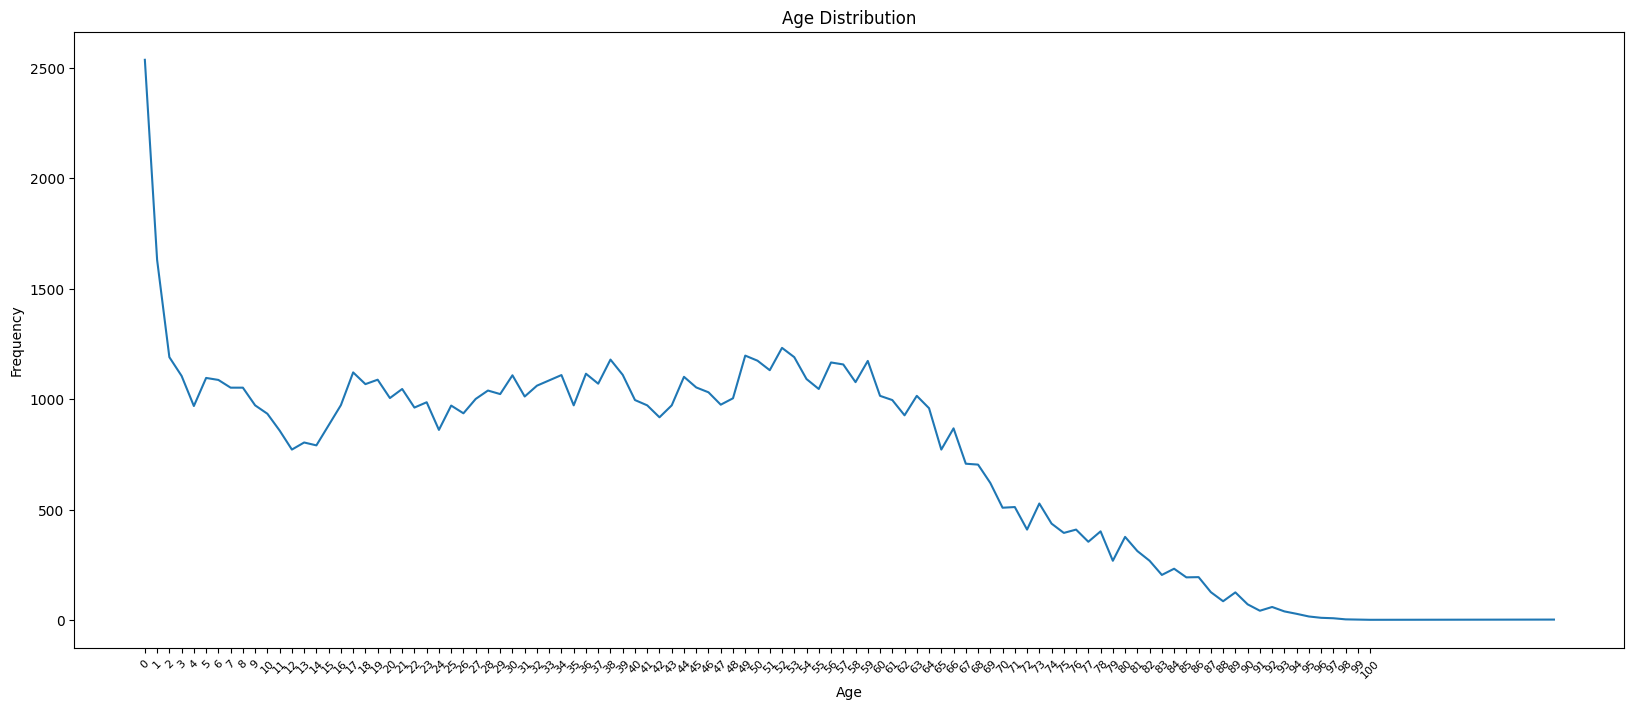

In [8]:
# Count the frequency of each age
age_counts = df['Age'].dropna().value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(20, 8))  # Adjust the size for better visibility
sns.lineplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(fontsize=8, rotation=45)
plt.xticks(range(0, 101, 1))  # Set x-axis ticks to show every age
plt.show()

Another point that we were interested to see was if more women or men missed appointments. We wanted to see an initial visual representation of it with a chart. The plot shows that there is a similar distribution between males and females that miss their appointments. With EDA, we also found out that most patients do not miss their appointments (also regardless of sex). 

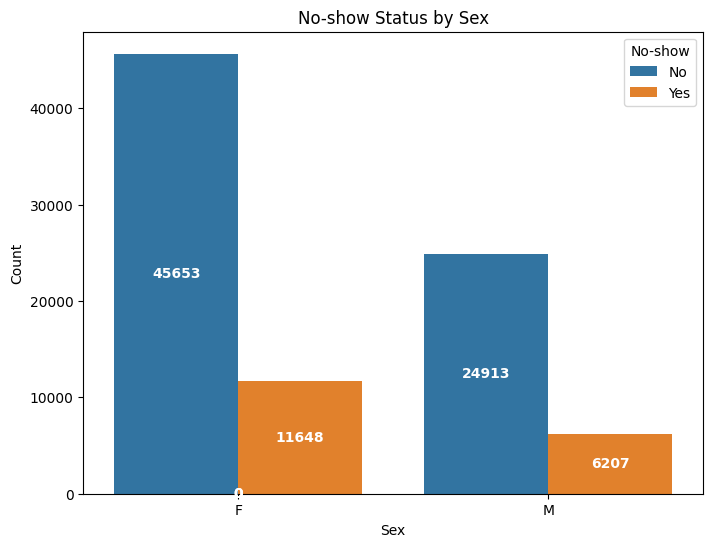

In [9]:
# Visualization of No-Shows by Sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='No-show', data=df)
plt.title('No-show Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='No-show', loc='upper right')

# Adding the count numbers inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{int(height)}',
            ha='center', va='center', color='white', fontweight='bold')

plt.show()

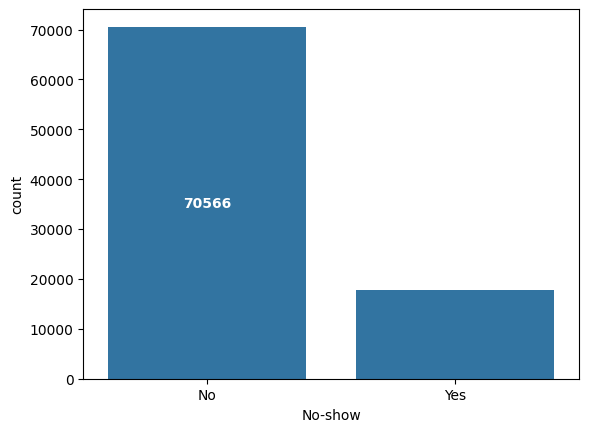

In [10]:
xs = sns.countplot(x='No-show', data=df)

# Adding the count numbers inside the bars
for p in xs.patches:
    height = p.get_height()
    xs.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{int(height)}',
            ha='center', va='center', color='white', fontweight='bold')
    plt.show()

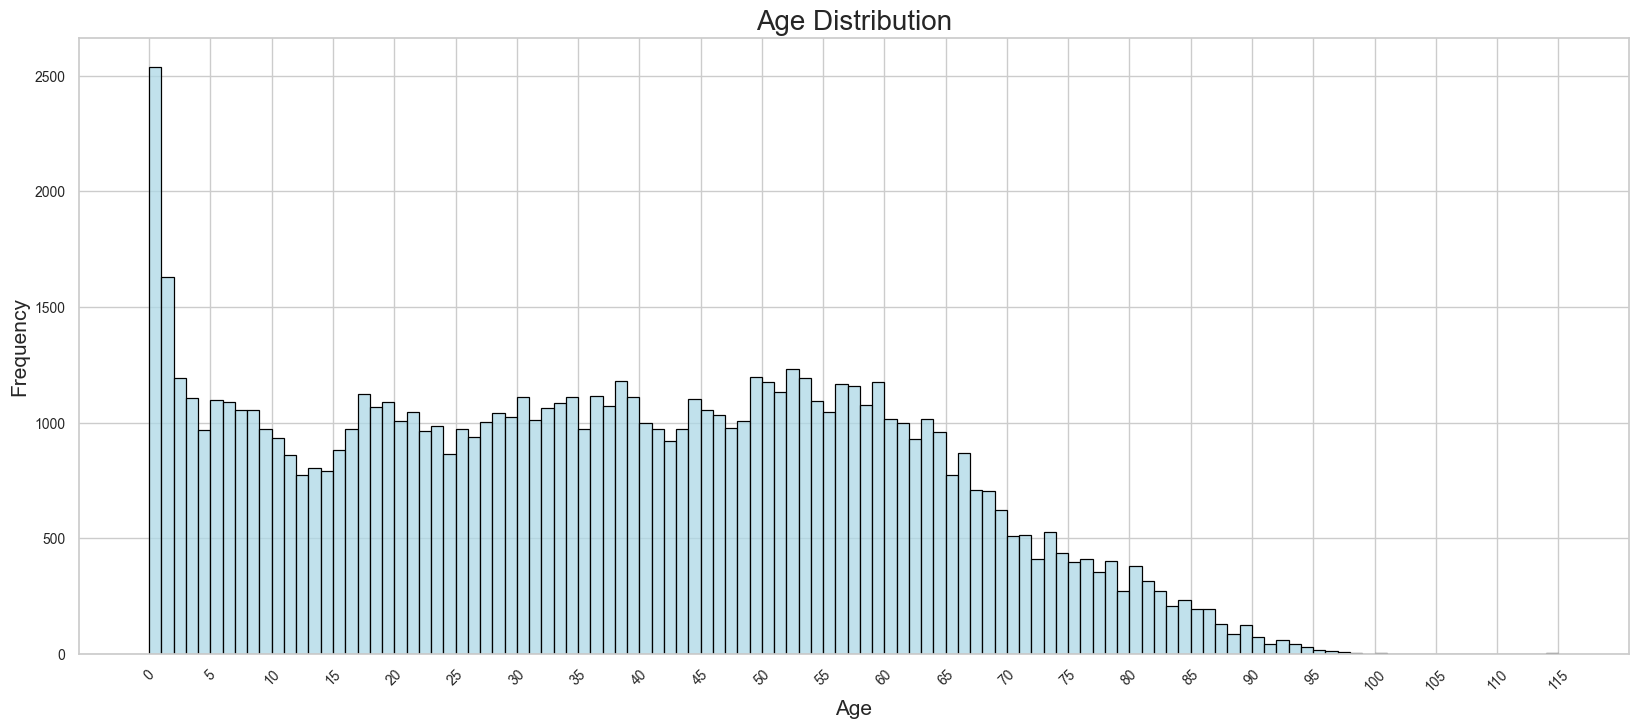

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'Age' is the column with age data
# Drop NA values from 'Age' column for accurate plotting
ages = df['Age'].dropna()

# Set the style
sns.set(style="whitegrid")

# Create the plot with adjusted aesthetics
plt.figure(figsize=(20, 8))

# Plotting the histogram
sns.histplot(ages, bins=range(int(ages.min()), int(ages.max()) + 1, 1), kde=False, color="lightblue", edgecolor='black')

# Adding titles and labels
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Adjust x-axis ticks to show every age with better readability
plt.xticks(range(0, int(ages.max()) + 1, 5), fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

Another point that we wanted to visualize was whether it was effective to send an SMS notification to the patients. Surprisingly, the plot did not indicate that the patients that receive a SMS are less likely to miss their appointments. To us, that was a point that we decided that needed more investigation, even after visualizing it. The visual analysis with plots also showed that the presence of medical conditions (such as hypertension, diabetes, and alcoholism) does not make people more likely to miss their appointments. 

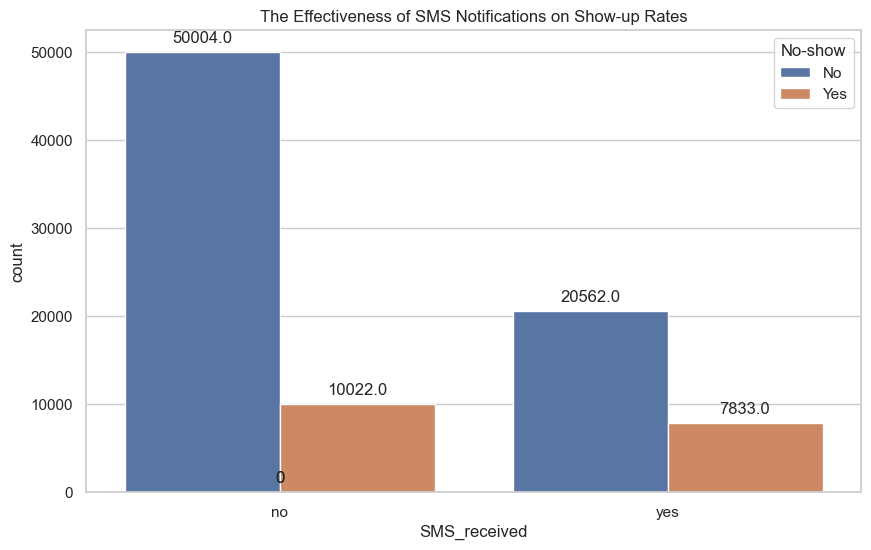

In [12]:
#Does receiving an SMS make more people show up to their appointments?

#sns.countplot(x='SMS_received', hue='No-show', data=df)
#plt.title('The Effectiveness of SMS Notifications on Show-up Rates')
#plt.xlabel('SMS Received')
#plt.ylabel('Count')

plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('The Effectiveness of SMS Notifications on Show-up Rates')

ax = plt.gca()  # Get the current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# interpretation: it doesn't make much of a difference... 
# also: no-show = 0 means the patient showed up

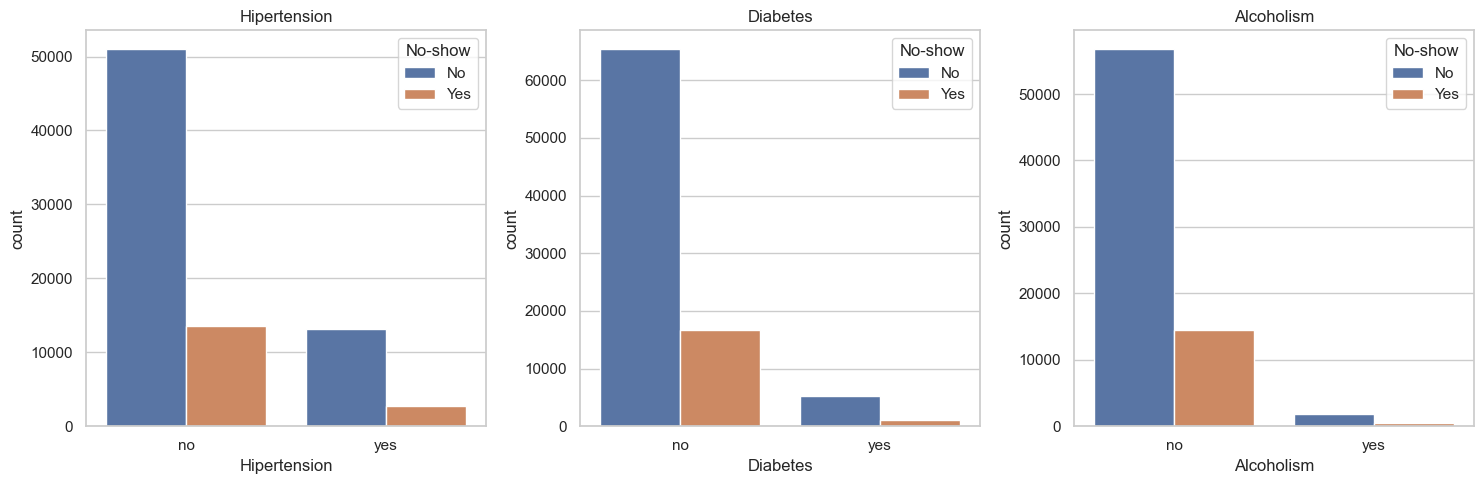

In [13]:


sns.set(style="whitegrid")  # Set a specific style

# Subplot for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust the number of columns as needed

# Plot for 'Hipertension'
sns.countplot(x='Hipertension', hue='No-show', data=df, ax=axes[0])
axes[0].set_title('Hipertension')

# Plot for 'Diabetes'
sns.countplot(x='Diabetes', hue='No-show', data=df, ax=axes[1])
axes[1].set_title('Diabetes')

# Plot for 'Alcoholism'
sns.countplot(x='Alcoholism', hue='No-show', data=df, ax=axes[2])
axes[2].set_title('Alcoholism')


plt.tight_layout()  #  Adjust layout for better spacing
plt.show()

When it comes to the days between the scheduled and the appointment date, our approach was to do a line plot to analyze the results. We were able to see that the plot indicates that the no-show rate tends to decrease as the number of days between scheduling and the appointment date increases, reaching its lowest point at around 90 days. To us, that clearly indicated that patients seem to be more committed to appointments that are further away.

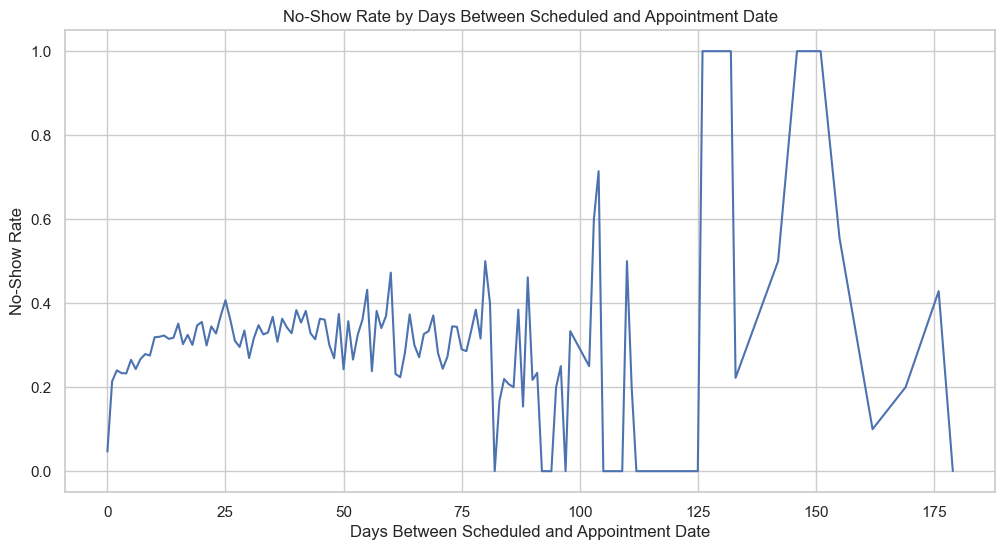

In [14]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate']).dt.date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
df['DaysBetween'] = (pd.to_datetime(df['AppointmentDate']) - pd.to_datetime(df['ScheduledDate'])).dt.days

# Remove cases where the difference is negative (errors in data)
df = df[df['DaysBetween'] >= 0]

# Group by 'DaysBetween' and calculate no-show rate
no_show_rate = df.groupby('DaysBetween')['No-show'].apply(lambda x: (x == 'Yes').mean())

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=no_show_rate.index, y=no_show_rate.values)
plt.title('No-Show Rate by Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

To further explore the days between scheduling and the appointment date, we decided to do a regression plot, and it suggested a potential nonlinear relationship. This plot indicates a decreasing trend in the no_show rate as the days between scheduling and the appointment date increase.


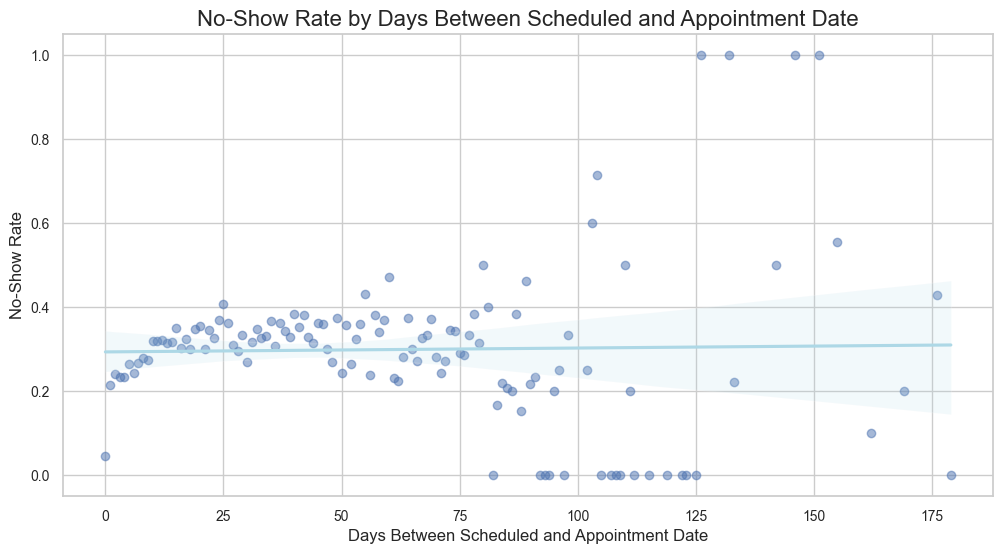

In [15]:

plt.figure(figsize=(12, 6))

# Scatter plot with a regression line to show the trend
sns.regplot(x=np.array(no_show_rate.index), y=no_show_rate.values, scatter_kws={'alpha':0.5}, line_kws={'color': 'lightblue'})

plt.title('No-Show Rate by Days Between Scheduled and Appointment Date', fontsize=16)
plt.xlabel('Days Between Scheduled and Appointment Date', fontsize=12)
plt.ylabel('No-Show Rate', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

With the visualizations and EDA we were able to find 5 key points that helped us with ideas on how to create a tailored machine learning model:
Age Distribution: The dataset has more younger individuals, with a higher frequency of appointments for those under 60 years old.

Gender: No significant difference in no-show rates between males and females.
SMS Notifications: Receiving SMS notifications does not appear to have an impact on appointment no-show rates.

Health Conditions: Hypertension, diabetes, and alcoholism do not seem to influence no-show rates.

Time Between Scheduling and Appointment: Patients may be more likely to attend appointments scheduled further in advance.

These visualizations provided valuable information for understanding the characteristics of the dataset, helping our team to develop strategies to reduce no-show rates.


### 3.3 Analysis of missing data: 
In the hospital dataset, we were able to find many instances in which we could see missing data. We learned that missing data should not be ignored, so to tackle the problem, we first analyzed how many missing values were in each column.

In [16]:
missing_values = df.isnull().sum()

print("Total Missing Values in Each Column:")
print(missing_values)

Total Missing Values in Each Column:
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8806
Community          10713
SocialWelfare      12518
Hipertension        8021
Diabetes               0
Alcoholism         14888
Handcap                0
SMS_received           0
No-show                0
DaysBetween            0
dtype: int64


#### Then, we calculated how many values are missing in the entire DataFrame.

In [17]:
total_missing = df.isnull().sum().sum()

print("Total Missing Values in the Entire DataFrame:", total_missing)

Total Missing Values in the Entire DataFrame: 54946


### Visualization of missing data

In order to visualize the missing data, our group decided to do a heatmap. The heatmap provided a clear visualization that helped us look at the missing values (indicated by a yellow line). The heatmap also helped us to identify patterns, and which columns had more missing values. At the end, we concluded that Alcoholism, SocialWelfare, and Community are some of the columns that contain the most missing data.


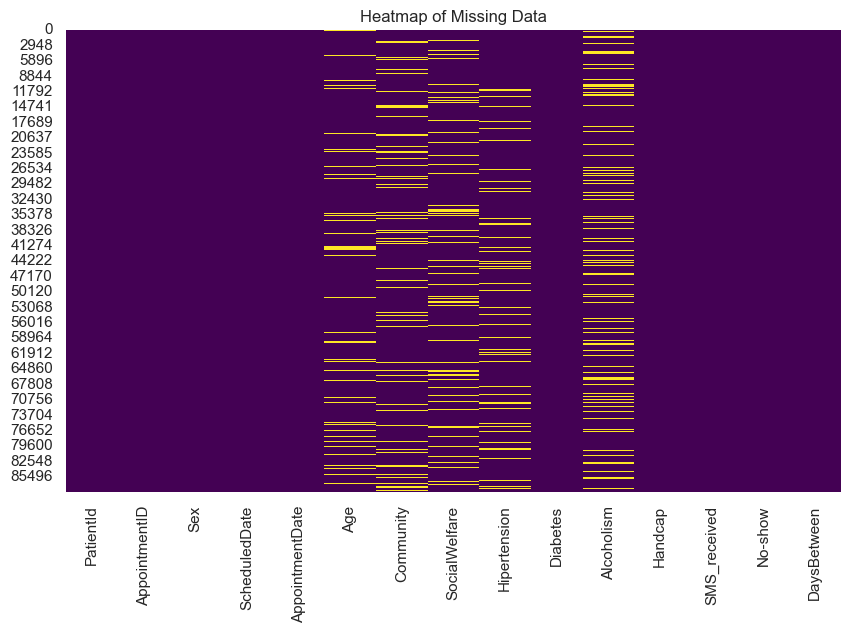

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

## How and why did you select the features?

Firstly we excluded Unique identifiers (AppointmentID, PatientID) and the target variable (No-Show) as possible features.

Then we did a chi-squared test, which is a statistical test to examine the relationships between categorical variables.

Our main point of interest was the p value. A common threshold for significance is 0.05, meaning that features with a p-value of less than 0.05 are generally considered to have a statistically significant association with the target variable.

We did this by importing the chi2_cotingency function and looping through every categorical column. As a result we only included the chi-square value and the p-value.

The test showed that 5 out of possible 8 columns had a p value of less than 0.05.

Columns:

SMS_received:
Chi-Squared: 1419.39, p-value: ~0 (extremely small)

Diabetes:
Chi-Squared: 16.65, p-value: 0.000045 (4.484e-05)

Hipertension:
Chi-Squared: 107.53, p-value: ~0 (extremely small)

SocialWelfare:
Chi-Squared: 74.40, p-value: ~0 (extremely small)

Community:
Chi-Squared: 369.74, p-value: ~0 (extremely small)

These features show statistically significant associations with the target variable and are likely to be informative for the machine learning model.

However after various tests in which we changed the features, we realised that we achieve better results if we include all features.

For this reason, we decided to include all features in the end.

In [19]:
from scipy.stats import chi2_contingency

# Defining your columns
columns = ['SMS_received', 'Handcap', 'Alcoholism', 'Diabetes', 'Hipertension', 'SocialWelfare', 'Community', 'Sex']

# Initialize a list to store results
results = []

# Looping through columns and performing Chi-Squared tests
for column in columns:
    contingency_table = pd.crosstab(df['No-show'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((column, chi2, p))

# Printing results
for result in results:
    print(f"{result[0]}: Chi-Squared: {result[1]}, p-value: {result[2]}")

SMS_received: Chi-Squared: 1419.388543313157, p-value: 1.28610953807157e-310
Handcap: Chi-Squared: 6.683590603469788, p-value: 0.15358403919421615
Alcoholism: Chi-Squared: 0.00793475025519667, p-value: 0.9290205450914285
Diabetes: Chi-Squared: 16.65451865577708, p-value: 4.484335612387797e-05
Hipertension: Chi-Squared: 107.5274672128125, p-value: 3.4114457176530104e-25
SocialWelfare: Chi-Squared: 74.4014289087675, p-value: 6.374285063485271e-18
Community: Chi-Squared: 369.743801491314, p-value: 8.159270646628953e-39
Sex: Chi-Squared: 1.8287025081234554, p-value: 0.17628087565048528


## How and why did you transform the data?

In this section of our noteook, we prepare our dataset for machine learning modeling through various preprocessing steps.

We start by importing necessary functions from scikit-learn. This includes 'train_test_split' for splitting the data into training and testing sets, 'Pipeline' for streamlining preprocessing and modeling steps, 'Simpleimputer' to fill missing values, 'OneHotEncoder' to convert categorical variables into a format that can be interpreted by machine learning models, and The 'ColumnuTransformer' to apply the transformations.

After that we defined our features and seperated them into numerical ('num_features') and categorical ('cat_features') and specify our target variable 'y'.

Lastly we used the 'train_test_split' do divide our data into training and testing sets, with 30% of the data reserved for testing. We tried out different splits, but achieved the best scores with 30% testing data.

In [20]:
# Import train test split and pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

# import the imputing function
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features = ['Age', 'Community', 'Handcap', 'Sex', 'SMS_received', 'Hipertension', 'Diabetes', 'Alcoholism', 'SocialWelfare']
num_features = ['Age']
cat_features = ['Sex', 'SMS_received','Community', 'Handcap', 'Hipertension', 'Diabetes', 'Alcoholism', 'SocialWelfare']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#Target variable y is what we are trying to predict or explain. y = target variable
#defined it by extracting it from the DataFrame

## How did you deal with missing data?

We used the Scikit-learn function 'SimpleImputer' to impute missing values.

For numeric values, we imputed the mean.

For categorical values we imputed the mode.

In [21]:
# Definition of imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent') # mode = most frequent


## How did you encode categorical features?

We utilized 'OneHotEncoder' with specific parameters to encode the categorical variables.

handle_unknown='ignore': 
This ensures that any unknown category encountered during transformation is ignored.

drop='if_binary': 
This means that when we have columns that only have two possible answers (e.g yes and no), instead of creating two seperate columns for each possible answer, it simplifies it by using just one column. A value of 1 in this column represent s one of the options (e.g yes or no), and a value of 0 represents the other option.

sparse_output=False: 
Normally 'OneHotEncoder' tries to create a sparse matrix as output, but we chose to have it give us a dense array instead, because we knew from the classes that it is easier to work with.

In [22]:
# Definition of OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)


Here we defined the ColumnTransformer to apply these transformations selctively:

The mean for numerical variables

The mode and OneHotEncoder for the categorical variables.

In [23]:
# Definition of ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_features),
        ('cat', Pipeline(steps=[('imputer', cat_imputer),
                                ('onehot', ohe)]), cat_features)
    ]
)

After that we loaded the Test Data into the notebook and added the column to it which we derived earlier 'Days_Between'

In [24]:
# get test-data
test_df = pd.read_csv("test.csv")

In [25]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
test_df['ScheduledDate'] = pd.to_datetime(test_df['ScheduledDate']).dt.date
test_df['AppointmentDate'] = pd.to_datetime(test_df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
test_df['DaysBetween'] = (pd.to_datetime(test_df['AppointmentDate']) - pd.to_datetime(test_df['ScheduledDate'])).dt.days

In [26]:
combined_df = pd.concat([test_df, X_test])
# Here I Added DaysBetween in test_df

## Which machine learning models did we use?

We used  Decision Tree, RandomForest and XGBoost as our machine learning models.

## Decision Tree:
Works by splitting the dataset into subsets based on the most significant feature, with the goal to maximize the information gain or minimize impurity at each split. 

In [27]:
# Instantiate Decision Tree

from sklearn.tree import DecisionTreeClassifier

dectree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini'))
])

In [28]:
# Fit X train and Y train
dectree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'SocialWelfare'])])),
                ('classifier', DecisionTreeClassifier())])

In [29]:
y_pred_dectree = dectree_pipeline.predict(X_test)

In [30]:
# Predict for the Decision Tree Model
predictions_test_dectree = dectree_pipeline.predict(test_df)

In [31]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_gs_dectree = accuracy_score(y_test, y_pred_dectree)
f1_dectree = f1_score(y_test, y_pred_dectree, average='macro')
accuracy_gs_dectree, f1_dectree

(0.7561637638543316, 0.5164799708710257)

In [32]:
submission_dectree = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test_dectree})

#Submission Dec Tree

filepath = 'Submission_DecTree.csv'
submission_dectree.to_csv(filepath, index=False)

## GridSearch to DecisionTree

In [33]:
from sklearn.model_selection import GridSearchCV

# Set parameters
params = {
    # "classifier__ccp_alpha": [0.0, 1.0],
    'classifier__class_weight': [None, 'balanced'],
    "classifier__criterion": ["gini", "entropy"]
}

opt_dectree = GridSearchCV(dectree_pipeline, params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1, return_train_score=True)

In [34]:
opt_dectree.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Sex',
                                                                          'SMS_received',
                                                                          'Community',
                                                                          'Handcap',
                                                                          'Hipertension',
                                                                          'Diabetes',
                                                                          'Alcoholism',
                                                                          'SocialWelfare'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [35]:
y_pred_dectree_gridsearch = opt_dectree.best_estimator_.predict(X_test)

In [36]:
accuracy_gs_dectree = accuracy_score(y_test, y_pred_dectree_gridsearch)
f1_dectree = f1_score(y_test, y_pred_dectree_gridsearch, average='macro')
accuracy_gs_dectree, f1_dectree

(0.7573701274221518, 0.5184665558855072)

In [37]:
y_pred_dectree_gs_final = opt_dectree.best_estimator_.predict(test_df)

In [38]:
submission_grid = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': y_pred_dectree_gs_final})
#Submission GridSearch

filepath = 'Submission_1GridSearch_dectree.csv'
submission_grid.to_csv(filepath, index=False)

## RandomForest

A random forest is an ensemble method that builds multiple decision trees and combines their predictions. Each tree is trained on a random subset and selects features at each split. The final prediction is determined by averaging.
We used this because generally when using a random forest, a high accuracy can be achieved, it is unlikely to overfit and it is considered to be a good baseline model for classification tasks.

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [40]:
# Fit X train and Y train
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'SocialWelfare'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [41]:
# Predict X test
y_pred_randomforest = rfc_pipeline.predict(X_test)

In [42]:
# Predict for the Random Forest Model
predictions_test_randomforest = rfc_pipeline.predict(test_df)

In [43]:
submission_randomforest = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test_randomforest})

#Submission Random Forest

filepath = 'Submission_RandomForest.csv'
submission_randomforest.to_csv(filepath, index=False)

## Final Model: XGBoost

XGBoost, is short for Extreme Gradient Boosting. XGBoost is a powerful machine learning algorithm that belongs to the ensemble learning family. It is designed for tree-based algorithms and it is used for classification and regression tasks. XGBoost was the machine learning algorithm that gave us the best results, that is why we would like to further explain how this algorithm works, and what we did to improve it. 

We did 3 pipelines, and the first step in our first pipeline involves preprocessing the data. This includes addressing missing values and encoding categorical variables. Data preprocessing was important to make sure that the input features are suitable for the machine learning model.

We also have identified an imbalance in our dataset (we had more No values than Yes for ‘no-show’) , and to address that, we applied the Synthetic Minority Over-sampling Technique (SMOTE). We researched about SMOTE, and decided to use it to generate synthetic samples for the minority class, so that we could have a balanced class distribution. This helps to prevent the model from being biased towards the majority class (the No’s in this case).

The preprocessed data was then fed into the XGBoost classifier. XGBoost is an ensemble learning algorithm that combines the predictions of multiple decision trees to improve the accuracy. It is known for being an efficient and reliable machine learning model.

To enhance the performance of the XGBoost model, a grid search was performed on a set of hyperparameters. Hyperparameters are the configuration settings on our model. The objective was to find the combination of hyperparameters that would maximize the F1 score (which would be a balance between precision and recall).

The performance of the model is evaluated using cross-validation with two folds. Cross-validation helps to ensure that the model keep performing well and that it is not dependent on a specific split. In this case, two folds are chosen to optimize time and enable more experiments from our part.


In [44]:
# Import libraries
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Create an imbalanced pipeline with preprocessing, SMOTE, and XGBoost classifier
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    # ('classifier', DecisionTreeClassifier(criterion='gini', random_state=42)),
    # ('classifier', RandomForestClassifier(random_state=42))
    ('classifier', xgb.XGBClassifier(objective='binary:logistic'))
    # ('classifier', GradientBoostingClassifier())
    # svm 
])

# Define a grid of hyperparameters for XGBoost classifier
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 2, 4, 6],
    # xgb params:
   'classifier__n_estimators': [100, 200],
   'classifier__learning_rate': [0.01, 0.1, 0.2],
   'classifier__max_depth': [3, 4, 5, 6],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__scale_pos_weight': [1, 2, 3],
    'classifier__reg_alpha': [0, 0.1, 0.5, 1],
   'classifier__reg_lambda': [0, 0.1, 0.5, 1],
}

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define a scoring metric (macro F1 score)
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Perform Grid Search Cross-Validation to find the best hyperparameters
xgb_gs = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid,
                           scoring=macro_f1_scorer, cv=2, n_jobs=-1)

# Fit the model using the training data
xgb_gs.fit(X_train, y_train_encoded)

# Retrieve the best-performing XGBoost model from the grid search
best_xgb_model = xgb_gs.best_estimator_

C:\Users\Vic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [18:25:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


In [45]:
best_xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'Social...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [46]:
xgb_predictions = best_xgb_model.predict(X_test)
xgb_predictions = label_encoder.inverse_transform(xgb_predictions)
xgb_predictions_final = best_xgb_model.predict(test_df)
xgb_predictions_final = label_encoder.inverse_transform(xgb_predictions_final)

In [47]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_xgb = accuracy_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions, average='macro')
accuracy_xgb, f1_xgb

(0.747153735957174, 0.547289334758934)

In [48]:
# xgb: (0.6785041091759029, 0.6003212303552579)
# dec tree: (0.6484958154263741, 0.5882298290283661)
# randomforest (0.6100052778406092, 0.5621804231169687)

In [49]:
submission_xgb = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': xgb_predictions_final})
filepath = 'Submission_xgbnodaysbetween.csv'
submission_xgb.to_csv(filepath, index=False)

#### Confusion Matrix for the Models

We used confusion matrix to evaluate the performance of each model on the data with the true values (test.csv). A confusion matrix can be useful to assess the performance of model because it presents a visual breakdown of the predictions.
In our models, ‘Yes’ represent the people who will miss an appointment, and ‘No’ represents the people who will not miss a hospital visit appointment.
In the following confusion matrixes:
-	True Positive is when the model correctly predicts that a person will miss a hospital visit (and they indeed miss it).
-	True Negative is when the model correctly predicts that a person will not miss a hospital visit (and they do not miss it).
-	False Positive is when the model incorrectly predicts that a person will miss a hospital visit (when they do not miss it, which is Type I error).
-	False Negative is when the model incorrectly predicts that a person will not miss a hospital visit (when they miss it, which is Type II error).

##### Decision Tree:

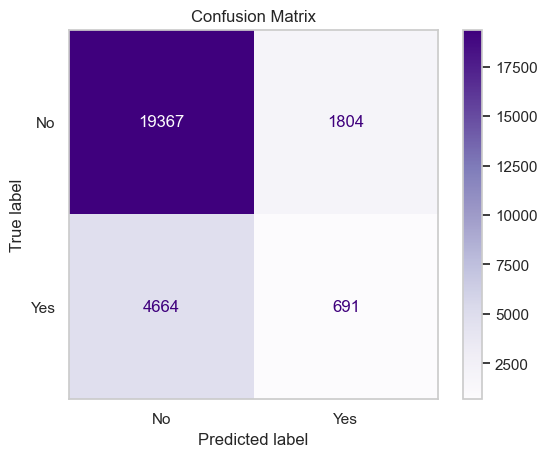

In [51]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred_dectree, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)

# Display confusion matrix without grid lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Purples, include_values=True, values_format='d')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.grid(False) 
plt.show()

##### Random Forest:

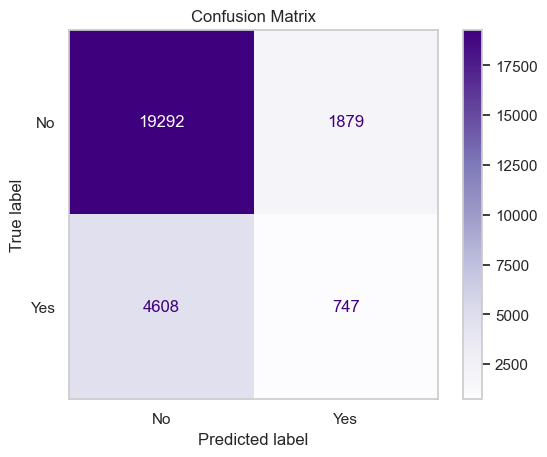

In [52]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred_randomforest, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
# Display confusion matrix without grid lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Purples, include_values=True, values_format='d')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.grid(False) 
plt.show()

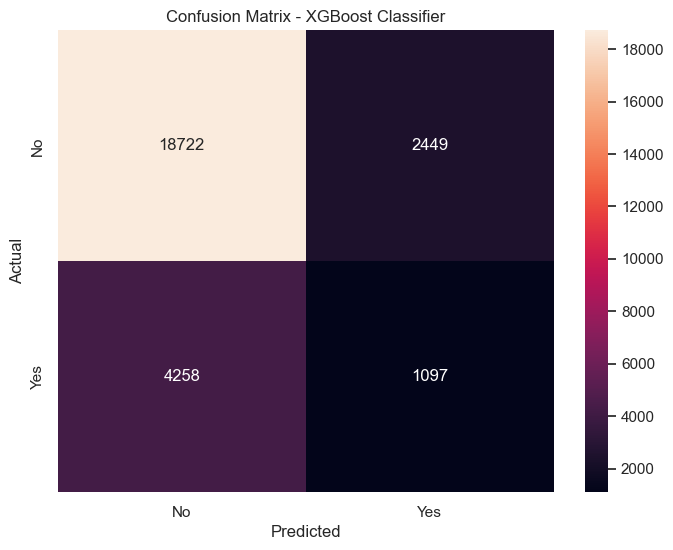

In [53]:
# Final Machine Learning Model Confusion Matrix, showing the best results

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for XGBoost
conm = confusion_matrix(y_test, xgb_predictions, labels=class_labels)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model Evaluation

### How did you compare the different models?

In the following part we will compare the models by doing a classification report for each of them.

##### Decision Tree Classification Report:

In [57]:
# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dectree))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86     21171
         Yes       0.28      0.13      0.18      5355

    accuracy                           0.76     26526
   macro avg       0.54      0.52      0.52     26526
weighted avg       0.70      0.76      0.72     26526



##### Random Forest Classification Report:

In [59]:
# Print classificatino report
print(classification_report(y_test, y_pred_randomforest))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86     21171
         Yes       0.28      0.14      0.19      5355

    accuracy                           0.76     26526
   macro avg       0.55      0.53      0.52     26526
weighted avg       0.70      0.76      0.72     26526



##### XGB Classification Report:

In [58]:
# Print classificatino report
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

          No       0.81      0.88      0.85     21171
         Yes       0.31      0.20      0.25      5355

    accuracy                           0.75     26526
   macro avg       0.56      0.54      0.55     26526
weighted avg       0.71      0.75      0.73     26526



What were the evaluation scores of the different machine-learning models?
We realized that the macro avg f1-score is the most important score and therefore XGBoost gave us the best results.

DecisionTree = 0.52

RandomForest = 0.52

XGBoost = 0.55


## Are both false positives and false negatives equally important? 

No, especially in the case of hospital appointments False Negatives are more costly because when the machine predicts someone would not miss their appointments, the staff will not take any actions on reminding that person but if that person doesn't show up because of that, then they have one spot in which they could've treated another patient.

When it comes to false positives on the other hand, we would predict that someone who's going to show up would miss their appointment, would therefore for example send any kind of reminder and then that person would still come. That would mean, we don't "loose" any time, resources etc. 

## Business Use:
With our model, it is possible to make better decisions when it comes to organizing the appointments within the hospital based on the features the patients have.

The hospital could use the machine learning model to predict whether a patient will show up to their appointment or not and send the notification only to patients who are identified to be no-shows.

The EDA for example shows that the SMS notification does not have a huge impact on whether the patients attend the appointment or not. 

Therefore, the hospital could focus their resources on other things and try out other notifications instead of SMS. 

Now that it is possible to identify patients who are most likely to not attend, the resources could be used to make calls only for them and ask in person whether the patient will attend. 

That could be a more effective way to remind the patients than sending out an SMS